In [1]:
import pickle
import shap
import pandas as pd
import numpy as np
from mlworkflow.models.regression_models import SVRModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

shap.plots.initjs()

In [2]:
# Load and prepare the dataset
file_path = './df_trim_boril_type.csv'
df = pd.read_csv(file_path, sep=';')

obj_var = "ratio"

feature_var = ['Solid_angle_G_Emin_ligand', 'nucleofug_Boltz_ligand', 'IP_Boltz_react', 'Sterimol_B_1_Boltz_ligand',
               'nucleo_Emin_react', 'Dispersion_area_Boltz_ligand', 'Pyr_P_Boltz_react',
               'Sterimol_bur_B_5_Boltz_react', 'Pyr_alpha_Boltz_react', 'VBur_Emin_ligand',
               'Sterimol_bur_B_5_Emin_react', 'Dispersion_area_Emin_ligand', 'Solid_angle_Boltz_ligand',
               'Sterimol_B_1_Emin_ligand', 'Solid_angle_Emin_ligand', 'Pyr_alpha_Emin_react',
               'Solid_angle_G_Boltz_ligand', 'Sterimol_bur_B_1_Boltz_ligand', 'HOMO_Boltz_react']

X = df[feature_var]
y = df[obj_var].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clean_names = ['Solid angle G Emin ligand', 'Nucleofugality Boltz ligand', 'IP Boltz reactive', 'Sterimol B1 Boltz ligand',
               'Nucleophilicity Emin reactive', 'Dispersion area Boltz ligand', 'Pyramidalization P Boltz reactive',
               'Sterimol buried B5 Boltz reactive', 'Pyramidalization alpha Boltz reactive', 'Buried volume Emin ligand',
               'Sterimol buried B5 Emin reactive', 'Dispersion area Emin ligand', 'Solid angle Boltz ligand',
               'Sterimol B1 Emin ligand', 'Solid angle Emin ligand', 'Pyramidalization alpha Emin reactive',
               'Solid angle G Boltz ligand', 'Sterimol buried B1 Boltz ligand', 'HOMO Boltz reactive']
X_test.columns = clean_names

In [3]:
val_idx = [86, 124, 38, 80, 54, 11, 119, 126, 85, 81, 55, 92, 121, 72]
file_path = './df_trim_boril_type.csv'
df = pd.read_csv(file_path, sep=';')
df_val = df.iloc[val_idx]
df_val.reset_index(inplace=True, drop=True)
df = df[[x not in df_val.index for x in df.index]]

obj_var = "ratio"

feature_var = ['Solid_angle_G_Emin_ligand', 'nucleofug_Boltz_ligand', 'IP_Boltz_react', 'Sterimol_B_1_Boltz_ligand',
               'nucleo_Emin_react', 'Dispersion_area_Boltz_ligand', 'Pyr_P_Boltz_react',
               'Sterimol_bur_B_5_Boltz_react', 'Pyr_alpha_Boltz_react', 'VBur_Emin_ligand',
               'Sterimol_bur_B_5_Emin_react', 'Dispersion_area_Emin_ligand', 'Solid_angle_Boltz_ligand',
               'Sterimol_B_1_Emin_ligand', 'Solid_angle_Emin_ligand', 'Pyr_alpha_Emin_react',
               'Solid_angle_G_Boltz_ligand', 'Sterimol_bur_B_1_Boltz_ligand', 'HOMO_Boltz_react']

X_train = df
y_train = df[obj_var].values
X_test = df_val[feature_var]
y_test =  df_val[obj_var].values

In [4]:
# Train the model
m = SVRModel(components=[MinMaxScaler()])
X_train[obj_var] = y_train
m.assign_params([3., 0.61906065, 0., 1., 0.1])
m.fit(X_train, [obj_var], feature_var, split=False, print_res=False)

# with (open("borilcobr_rev_SVR.pkl", "rb")) as openfile:
#     m = pickle.load(openfile)

In [5]:
def fixed_pred(x):
    df_in = pd.DataFrame(x, columns=m.feature_var)
    return m.predict(df_in)

explainer = shap.KernelExplainer(fixed_pred, X_test)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/14 [00:00<?, ?it/s]

In [6]:
# Plot the SHAP values of a single prediction
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:])

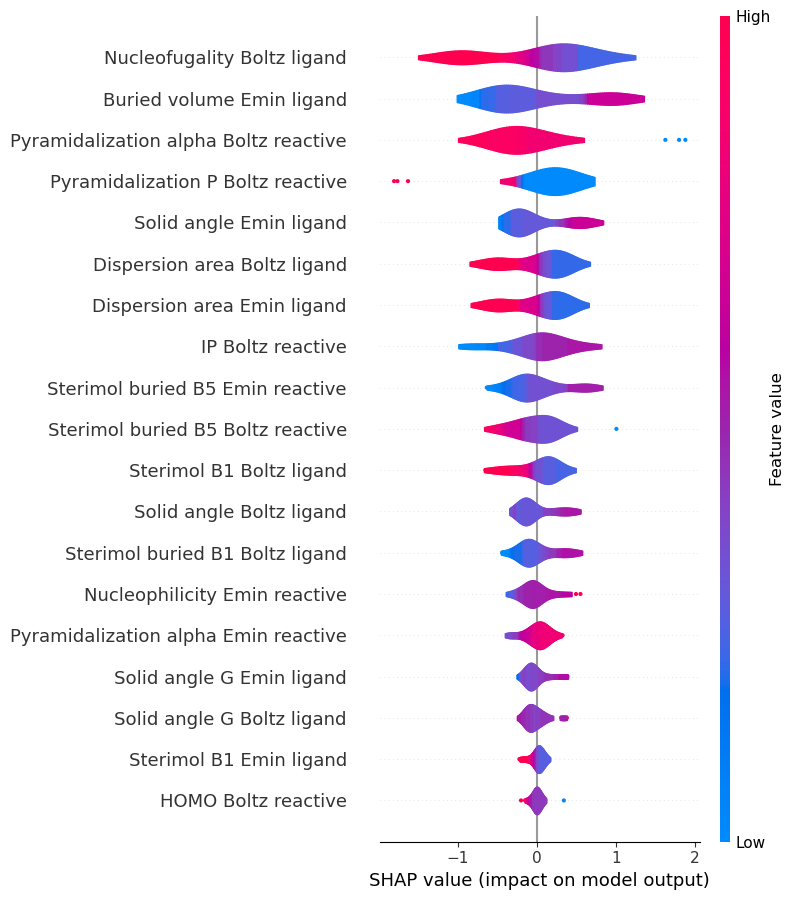

In [31]:
# Explain all the predictions in the test set
shap.summary_plot(shap_values, X_test, plot_type='violin', show=False)
plt.savefig("shap_summary_full.pdf",dpi=700) #.png .pdf 
plt.show()

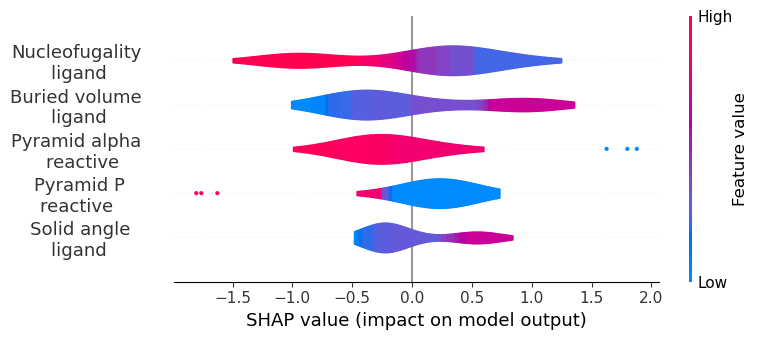

In [48]:
# Explain top 5 variables

clean_names = ['Solid angle G Emin ligand', 'Nucleofugality\nligand      ', 'IP Boltz reactive', 'Sterimol B1 Boltz ligand',
               'Nucleophilicity Emin reactive', 'Dispersion area Boltz ligand', 'Pyramid P   \nreactive     ',
               'Sterimol buried B5 Boltz reactive', 'Pyramid alpha\nreactive    ', 'Buried volume\nligand      ',
               'Sterimol buried B5 Emin reactive', 'Dispersion area Emin ligand', 'Solid angle Boltz ligand',
               'Sterimol B1 Emin ligand', 'Solid angle  \nligand      ', 'Pyramidalization alpha Emin reactive',
               'Solid angle G Boltz ligand', 'Sterimol buried B1 Boltz ligand', 'HOMO Boltz reactive']
X_test.columns = clean_names

shap.summary_plot(shap_values, X_test, plot_type='violin', max_display=5, show=False)
plt.savefig("shap_summary_top5.pdf",dpi=700) #.png .pdf 
plt.show()

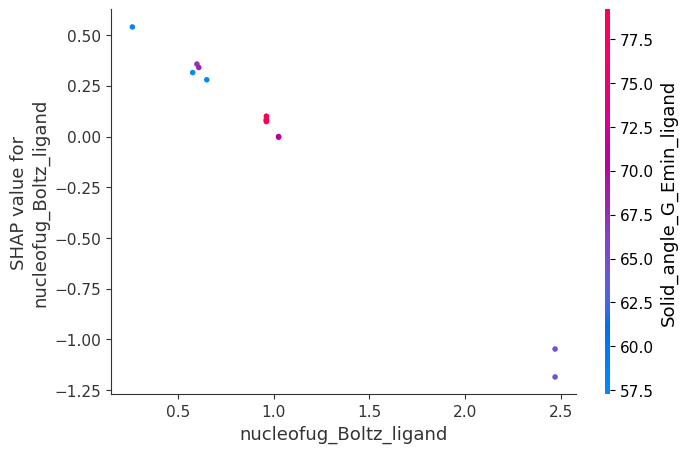

In [41]:
shap.dependence_plot("nucleofug_Boltz_ligand", shap_values, X_test)

In [42]:
shap.force_plot(explainer.expected_value, shap_values, X_test)